In [1082]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [1083]:
df= pd.read_csv("../../data/processed/oline_merge.csv")

In [1084]:
df = df[df.year < 2020]
df = df[df.year >= df.draft_yr + 3]

In [1]:
df.dtypes

NameError: name 'df' is not defined

In [1086]:
df = df.drop('year',axis=1)
df = df.drop('playername',axis=1)
df = df.drop('team',axis=1)
df = df.drop('basesalarycap (10^8)',axis=1)
df = df.drop('cashspent (M)',axis=1)
df = df.drop('caphit (M)',axis=1)
df = df.drop('Unnamed: 0',axis=1)
df = df.drop('Unnamed: 0.1',axis=1)
df = df.drop('catchpercent',axis=1)
df = df.drop('draft_yr',axis=1)

In [1087]:
len(df.dtypes)

25

# Splitting & Scaling

In [1088]:
from sklearn.model_selection import train_test_split
X = df.drop('Percenthit (%)',axis=1).values
y = df['Percenthit (%)'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [1089]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# Model

In [1090]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [1091]:
len(X_test[1])

24

In [1092]:
X_train.shape
model = Sequential()

model.add(Dense(24, activation="relu"))
model.add(Dense(17, activation="relu"))
model.add(Dense(17, activation="relu"))
model.add(Dense(17, activation="relu"))
model.add(Dense(17, activation="relu"))
model.add(Dense(1))

model.compile(optimizer="adam", loss="mae")
model.fit(x=X_train, y= y_train, validation_data=(X_test,y_test),batch_size=16,epochs=250)

Epoch 1/250
12/12 [==============================] - 0s 9ms/step - loss: 2.4654 - val_loss: 1.8789
Epoch 2/250
12/12 [==============================] - 0s 3ms/step - loss: 1.9831 - val_loss: 1.5301
Epoch 3/250
12/12 [==============================] - 0s 3ms/step - loss: 1.7023 - val_loss: 1.5657
Epoch 4/250
12/12 [==============================] - 0s 3ms/step - loss: 1.7108 - val_loss: 1.5291
Epoch 5/250
12/12 [==============================] - 0s 3ms/step - loss: 1.6786 - val_loss: 1.4707
Epoch 6/250
12/12 [==============================] - 0s 2ms/step - loss: 1.6280 - val_loss: 1.4747
Epoch 7/250
12/12 [==============================] - 0s 2ms/step - loss: 1.6326 - val_loss: 1.4829
Epoch 8/250
12/12 [==============================] - 0s 3ms/step - loss: 1.5835 - val_loss: 1.4312
Epoch 9/250
12/12 [==============================] - 0s 3ms/step - loss: 1.5666 - val_loss: 1.4350
Epoch 10/250
12/12 [==============================] - 0s 2ms/step - loss: 1.5471 - val_loss: 1.4422
Epoch 11/

12/12 [==============================] - 0s 2ms/step - loss: 1.1728 - val_loss: 1.2137
Epoch 84/250
12/12 [==============================] - 0s 2ms/step - loss: 1.1380 - val_loss: 1.2860
Epoch 85/250
12/12 [==============================] - 0s 2ms/step - loss: 1.1137 - val_loss: 1.2509
Epoch 86/250
12/12 [==============================] - 0s 2ms/step - loss: 1.1125 - val_loss: 1.2672
Epoch 87/250
12/12 [==============================] - 0s 2ms/step - loss: 1.1122 - val_loss: 1.3105
Epoch 88/250
12/12 [==============================] - 0s 2ms/step - loss: 1.1557 - val_loss: 1.2063
Epoch 89/250
12/12 [==============================] - 0s 2ms/step - loss: 1.1117 - val_loss: 1.2839
Epoch 90/250
12/12 [==============================] - 0s 2ms/step - loss: 1.1243 - val_loss: 1.2701
Epoch 91/250
12/12 [==============================] - 0s 2ms/step - loss: 1.1127 - val_loss: 1.2542
Epoch 92/250
12/12 [==============================] - 0s 2ms/step - loss: 1.0804 - val_loss: 1.2379
Epoch 93/250


12/12 [==============================] - 0s 2ms/step - loss: 0.6076 - val_loss: 1.2822
Epoch 246/250
12/12 [==============================] - 0s 2ms/step - loss: 0.6397 - val_loss: 1.3195
Epoch 247/250
12/12 [==============================] - 0s 2ms/step - loss: 0.6023 - val_loss: 1.3977
Epoch 248/250
12/12 [==============================] - 0s 2ms/step - loss: 0.6548 - val_loss: 1.3415
Epoch 249/250
12/12 [==============================] - 0s 2ms/step - loss: 0.5694 - val_loss: 1.2918
Epoch 250/250
12/12 [==============================] - 0s 2ms/step - loss: 0.5496 - val_loss: 1.3211


MSE:  3.44891743730212
RMSE:  1.8571261231543
MAE:  1.3210734690295691
ESV:  0.2496530558181942


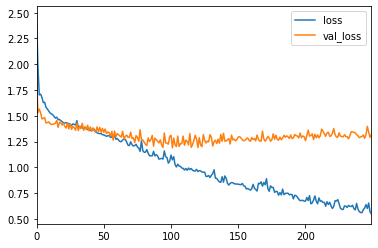

In [1093]:
losses = pd.DataFrame(model.history.history)
losses.plot()

from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score
predictions = model.predict(X_test)

print("MSE: ",mean_squared_error(y_test,predictions) )
print("RMSE: ",np.sqrt(mean_squared_error(y_test,predictions)) )
print("MAE: ",mean_absolute_error(y_test,predictions) )
print("ESV: ", explained_variance_score(y_test, predictions))

In [1094]:
#model.save('dnn')

In [1095]:
#loaded_model = tf.keras.models.load_model('dnn')

In [1096]:
# predictions = loaded_model.predict(X_test)
# print("MSE: ",mean_squared_error(y_test,predictions) )
# print("RMSE: ",np.sqrt(mean_squared_error(y_test,predictions)) )
# print("MAE: ",mean_absolute_error(y_test,predictions) )
# print("ESV: ", explained_variance_score(y_test, predictions))